<a href="https://colab.research.google.com/github/BrandonOrtiz7/Metodos-numericos/blob/main/SimpsonCompuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aproximación en [0,4]: 53.863845745864126
Suma en [0,2] y [2,4]: 53.863845745864126
Suma en [0,1], [1,2], [2,3], [3,4]: 53.616220796005805
Valor real: 53.598150033144236
Error absoluto [0,4]: 0.26569571271988934
Error en dos tramos: 0.26569571271988934
Error en cuatro tramos: 0.01807076286156928


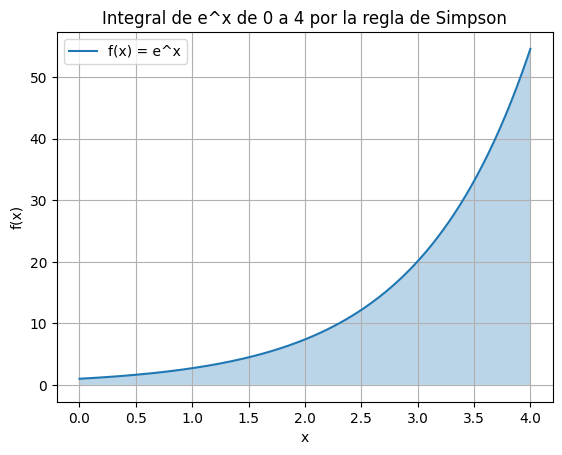

In [2]:
import numpy as np
import matplotlib.pyplot as plt        # graficar
import math        # importa math para usar la función exponencial

def f(x): return math.exp(x)        # define la función f(x) = e^x

def simpson_compuesta(f, a, b, n):
    h = (b - a) / n        # calcula el tamaño del paso h
    XI0 = f(a) + f(b)
    XI1 = 0        # inicializa la suma de los f(x) con x impares (x2i−1)
    XI2 = 0        # inicializa la suma de los f(x) con x pares (x2i)
    for i in range(1, n):        # recorre los puntos intermedios entre a y b
        x = a + i * h        # calcula el valor de x en el subintervalo i
        if i % 2 == 0:        # si i es par
            XI2 += f(x)        # acumula en la suma XI2
        else:        # si i es impar
            XI1 += f(x)        # acumula en la suma XI1
    XI = (h / 3) * (XI0 + 2 * XI2 + 4 * XI1)        # aplica la fórmula final de Simpson compuesta
    return XI        # retorna la aproximación

# Aproximación de la integral de 0 a 4 con n = 4
aprox_0_4 = simpson_compuesta(f, 0, 4, 4)

# Aproximaciones por subintervalos [0,2] y [2,4]
aprox_0_2 = simpson_compuesta(f, 0, 2, 2)
aprox_2_4 = simpson_compuesta(f, 2, 4, 2)
suma_2_tramos = aprox_0_2 + aprox_2_4

# Aproximaciones por subintervalos más pequeños [0,1], [1,2], [2,3], [3,4]
aprox_0_1 = simpson_compuesta(f, 0, 1, 2)
aprox_1_2 = simpson_compuesta(f, 1, 2, 2)
aprox_2_3 = simpson_compuesta(f, 2, 3, 2)
aprox_3_4 = simpson_compuesta(f, 3, 4, 2)
suma_4_tramos = aprox_0_1 + aprox_1_2 + aprox_2_3 + aprox_3_4


valor_real = math.exp(4) - 1        # calcula el valor exacto de la integral de e^x de 0 a 4

# Mostrar resultados
print("Aproximación en [0,4]:", aprox_0_4)
print("Suma en [0,2] y [2,4]:", suma_2_tramos)
print("Suma en [0,1], [1,2], [2,3], [3,4]:", suma_4_tramos)
print("Valor real:", valor_real)
print("Error absoluto [0,4]:", abs(valor_real - aprox_0_4))
print("Error en dos tramos:", abs(valor_real - suma_2_tramos))
print("Error en cuatro tramos:", abs(valor_real - suma_4_tramos))

# Gráfica
x_vals = np.linspace(0, 4, 400)        # crea un arreglo de 400 puntos entre 0 y 4
y_vals = np.exp(x_vals)        # calcula f(x) = e^x para cada punto
plt.plot(x_vals, y_vals, label="f(x) = e^x")        # grafica la función
plt.fill_between(x_vals, y_vals, alpha=0.3)        # colorea el área bajo la curva
plt.title("Integral de e^x de 0 a 4 por la regla de Simpson")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)        # cuadrícula
plt.show()
